In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import numpyro
import jax
import jax.numpy as jnp

/home/ljf1/dis/lora/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# a

In [12]:
data = pd.read_csv('src/1-Fragment_C_Hole_Measurements.csv')

In [21]:
data

,Section ID,Hole,Inter-hole Distance,Mean(X),Mean(Y)
0,0,1,NaN,15.59931,92.59653
1,1,2,NaN,16.44167,91.50069
2,1,3,1.440694,17.30764,90.34931
3,1,4,1.456973,18.15278,89.16250
4,1,5,1.299821,18.96528,88.14792
...,...,...,...,...,...
76,7,77,1.259985,108.69444,63.42778
77,7,78,1.430105,110.05486,63.86875
78,7,79,1.179606,111.14583,64.31736
79,7,80,1.428043,112.48021,64.82604


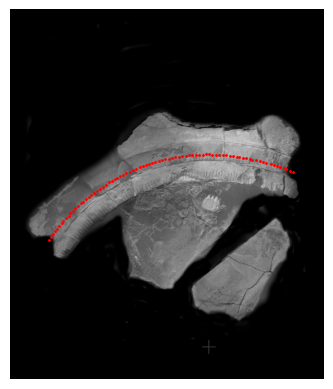

In [20]:
img = mpimg.imread('src/3-Figure-2-Engraved_Lines_with_Center.jpg')
fig, ax = plt.subplots()
ax.imshow(img, cmap='Grays_r')
ax.scatter(data['Mean(X)']*20, data['Mean(Y)']*20, s = 1, color="red")
ax.axis('off')
plt.show()

# b

In [25]:
def model(d, s, n, N_range, r_range, sigma_range):
    N = numpyro.sample("N", numpyro.distributions.Uniform(N_range[0], N_range[1]))
    r = numpyro.sample("r", numpyro.distributions.Uniform(r_range[0], r_range[1]))

    x0 = numpyro.sample("x0", numpyro.distributions.Uniform(-10, 10), sample_shape=(s,))
    y0 = numpyro.sample("x0", numpyro.distributions.Uniform(-10, 10), sample_shape=(s,))
    alpha = numpyro.sample("alpha", numpyro.distributions.Uniform(0, 2*jnp.pi), sample_shape=(s,))

    sigma_r = numpyro.sample("sigma_r", numpyro.distributions.InverseGamma(1, 1))
    sigma_t = numpyro.sample("sigma_t", numpyro.distributions.InverseGamma(1, 1))
    
    for j in range(s):
        phi = 2*jnp.pi*(jnp.arange(n) - 1) / N + alpha[j]
        r_ij = jnp.array(jnp.cos(phi), jnp.sin(phi))
        t_ij = jnp.array(jnp.sin(phi), -jnp.cos(phi))
        e_ij = r_ij - (d[j] - jnp.vstack((x0[j], y0[j])))
        numpyro.sample(f"obs_{j}", numpyro.distributions.MultivariateNormal(jnp.zeros(2), covariance_matrix=jnp.diag(jnp.array([sigma_r**2, sigma_t**2]))), obs=e_ij)